* DSC530: Week 7
* 7.2 Exercise
* Marty Hoehler
* 4-28-24

# Exercise 7-1

First, we will import the data as in weeks before.

In [1]:
import numpy as np

from os.path import basename, exists

def download(url):
    filename = basename(url)
    if not exists(filename):
        from urllib.request import urlretrieve

        local, _ = urlretrieve(url, filename)
        print("Downloaded " + local)

download("https://github.com/AllenDowney/ThinkStats2/raw/master/code/thinkstats2.py")
download("https://github.com/AllenDowney/ThinkStats2/raw/master/code/thinkplot.py")
download("https://github.com/AllenDowney/ThinkStats2/raw/master/code/nsfg.py")
download("https://github.com/AllenDowney/ThinkStats2/raw/master/code/scatter.py")
download("https://github.com/AllenDowney/ThinkStats2/raw/master/code/2002FemPreg.dct")
download("https://github.com/AllenDowney/ThinkStats2/raw/master/code/2002FemPreg.dat.gz")

import nsfg
import thinkstats2
import thinkplot
import numpy as np


Next, we'll take a sample of the data for our scatterplot

In [2]:
df = nsfg.ReadFemPreg()
sample = thinkstats2.SampleRows(df, 5000)
s_ages, s_weights = sample.agepreg, sample.totalwgt_lb

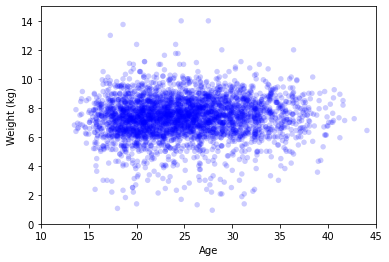

<Figure size 576x432 with 0 Axes>

In [3]:
thinkplot.Scatter(s_ages, s_weights)
thinkplot.Show(xlabel='Age',
                ylabel = 'Weight (kg)',
               axis = [10, 45, 0, 15])

Judging by the shape of the scatterplot for the sample, there does not appear to be a relationship between age and weight that can be seen.  Next, we'll look at a scatterplot of the whole population.  We'll use the text's recommendations for shading.  We take a step first to remove NA values from the data.

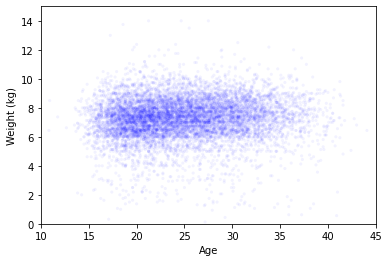

<Figure size 576x432 with 0 Axes>

In [29]:
df = df.dropna(subset=['agepreg', 'totalwgt_lb'])

ages, weights = df.agepreg, df.totalwgt_lb
thinkplot.Scatter(ages, weights, alpha=0.05, s=10)
thinkplot.Show(xlabel='Age',
                ylabel = 'Weight (kg)',
               axis = [10, 45, 0, 15])

The scatterplot of the full data does not show much of a relationship either.  
Next, we'll find our two correlation constants to see anything can be detected that way.  I'll use the book's definitions for Pearson's Correlation and Spearman Correlation.  

In [43]:


def Cov(xs, ys, meanx=None, meany=None):
    xs = np.asarray(xs)
    ys = np.asarray(ys)

    if meanx is None:
        meanx = np.mean(xs)
    if meany is None:
        meany = np.mean(ys)

    cov = np.dot(xs-meanx, ys-meany) / len(xs)
    return cov

def Corr(xs, ys):
    xs = np.asarray(xs)
    ys - np.asarray(ys)
    
    meanx, varx = thinkstats2.MeanVar(xs)
    meany, vary = thinkstats2.MeanVar(ys)
    
    corr =  Cov(xs, ys, meanx, meany) / np.sqrt(varx * vary)
    return corr

import pandas as pd

def SpearmanCorr(xs, ys):
    xranks = pd.Series(xs).rank()
    yranks = pd.Series(ys).rank()
    return Corr(xranks, yranks)

In [44]:
print('Pearson Correlation: ', Corr(ages, weights))
print('Spearman Correlation: ', SpearmanCorr(ages, weights))

Pearson Correlation:  0.06883397035410908
Spearman Correlation:  0.09461004109658226


Both correlation values indicate a slight positive correlation between age and weight.  Now, we will plot the percentiles of birth weight versus mother's age.  For this, I'm using code from the text examples ("Characterizing Relationships" section.)

0 3
1 181
2 1726
3 2404
4 2063
5 1559
6 798
7 268
8 36


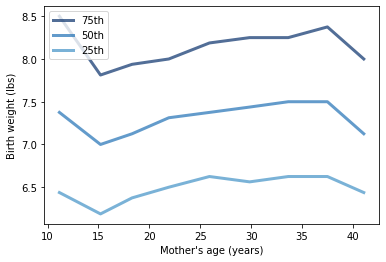

In [85]:
bins = np.arange(12, 44, 4)
indices = np.digitize(df.agepreg, bins)
groups = df.groupby(indices)
for i, group in groups:
    print(i, len(group))
    
ages = [group.agepreg.mean() for i, group in groups]
cdfs = [thinkstats2.Cdf(group.totalwgt_lb) for i, group in groups]
for percent in [75, 50, 25]:
    weights = [cdf.Percentile(percent) for cdf in cdfs]
    label = '%dth' % percent
    thinkplot.Plot(ages, weights, label=label)
    
    thinkplot.Config(xlabel="Mother's age (years)",
                     ylabel='Birth weight (lbs)',
                     legend=True)

This shows a slight positive correlation.  Birthweight increases as age increases, for the most part, with some disruption at the ends of the data set, where the sample sizes get smaller.

# Exercise 8-1

We will run an experiment, similar to the one in the book, to see if we can duplicate the results from the book.  Namely, that $\bar x$  yields a lower MSE than the median, and that S<sup>2</sup><sub>n-1</sub> is unbiased, compared to S<sup>2</sup>.

For my exercise, I'll take 2000 samples of size 9 each.  (The book took 1000 samples of 7 each.)  I would expect with the larger sample sizes, my RMSE should be lower than the book's example.

In [99]:
import random

def RMSE(estimates, actual):
    e2 = [(estimate-actual)**2 for estimate in estimates]
    mse = np.mean(e2)
    return np.sqrt(mse)

def Estimate_mu(n=9, m=2000):
    mu = 0
    sigma = 1
    means = []
    medians = []
    for _ in range(m):
        xs = [random.gauss(mu, sigma) for i in range(n)]
        xbar = np.mean(xs)
        median = np.median(xs)
        means.append(xbar)
        medians.append(median)
        
    print('rmse xbar', RMSE(means, mu))
    print('rmse median', RMSE(medians, mu))

In [100]:
Estimate_mu()

rmse xbar 0.34360970764308374
rmse median 0.4154537022663047


So we can see that $\bar x$ has a lower RMSE than median, as expected.  (We can also see that by increasing the sample size and the number of tests run, we lowered the RMSE for both, compared with the example in the book, which had RMSE at .41 for $\bar x$ and .53 for the median.)

Next, we'll use the code taught in the book to run a test of S<sup>2</sup><sub>n-1</sub> compared to S<sup>2</sup>.  I'll increase the number of tests we run.  We'll see if we can demonstrate that S<sup>2</sup> error remains, but S<sup>2</sup><sub>n-1</sub> error approaches zero as we increase the number of tests run.

In [101]:
def MeanError(estimates, actual):
    errors = [estimate-actual for estimate in estimates]
    return np.mean(errors)

def EstimateVar(n=9, m=2000):
    mu = 0
    sigma = 1
    estimates1 = []
    estimates2 = []
    for _ in range(m):
        xs = [random.gauss(mu, sigma) for i in range (n)]
        biased = np.var(xs)
        unbiased = np.var(xs, ddof=1)
        estimates1.append(biased)
        estimates2.append(unbiased)
        
    print('mean error biased', MeanError(estimates1, sigma**2))
    print('mean error unbiased', MeanError(estimates2, sigma**2))

In [105]:
EstimateVar()

mean error biased -0.11711214134125192
mean error unbiased -0.0067511590089084006


In [106]:
EstimateVar(9, 10000)

mean error biased -0.10875233573721461
mean error unbiased 0.0026536222956335385


In [107]:
EstimateVar(9, 100000)

mean error biased -0.11199885668115758
mean error unbiased -0.0009987137663023111


We can see that the error in S<sup>2</sup> does not decrease, even as we increase the number of tests run, but that the error in S<sup>2</sup><sub>n-1</sub> does decrease.  This demonstrates the bias in S<sup>2</sup>.

# Exercise 8-2

To estimate an exponential distribution, we'll build a function using concepts from the examples taught to us in the "Sampling Distributions" and "Exponential Distributions" sections of our text.

In [119]:
def EstimateExp(n=10, m=1000):
    lam = 2
    L = []
    for _ in range(m):
        xs = np.random.exponential(1.0/lam, n)
        LamSam = 1 / np.mean(xs)
        L.append(LamSam)
        
    cdf = thinkstats2.MakeCdfFromList(L)
    ci = cdf.Percentile(5), cdf.Percentile(95)
    stderr = RMSE(L, lam )

    print('rmse L: ', stderr)
    print('90% Confidence Interval: ', ci)
    
    thinkplot.Cdf(cdf)
    thinkplot.Show(xlabel= 'estimated L', ylabel='CDF')

rmse L:  0.7795244172229261
90% Confidence Interval:  (1.2498406898977403, 3.580987735765372)


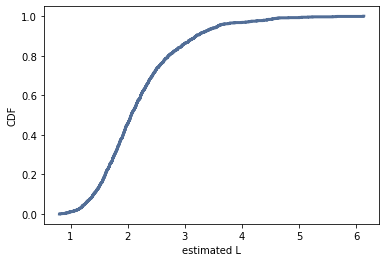

<Figure size 576x432 with 0 Axes>

In [120]:
EstimateExp()